In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import librosa.display



In [ ]:
import librosa

import pandas as pd
import os

n_mfcc = 40;
def extract_features(file_path):
    audio, sample_rate = librosa.load(file_path, sr = 22050)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    mfccs_mean = pd.DataFrame(mfccs.mean(axis=1)).transpose()
    return mfccs_mean


def create_dataframe(directory):
    data = []
    labels = []
    for subdir, _, files in os.walk(directory):
        for file in files:
            file_path = subdir + os.path.sep + file
            if file_path.endswith(".mp3"):
                features = extract_features(file_path)
                label = file.split(".")[0]
                data.append(features)
                labels.append(label)
    data_df = pd.concat(data, ignore_index=True)
    data_df['label'] = labels
    return data_df


directory = '/content/sample_data/my_audio'
data_df = create_dataframe(directory)

data_df.to_csv('audio_vectors.csv', index=False)

In [ ]:
data_df['label'] = data_df['label'].astype(str)

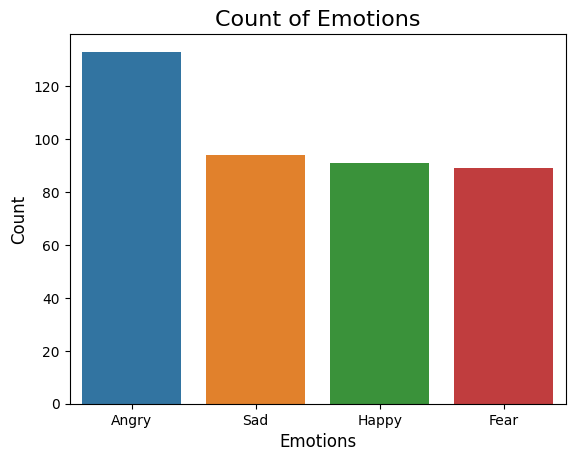

In [ ]:
emotion_counts = data_df['label'].value_counts()
sns.barplot(x=emotion_counts.index, y=emotion_counts)
plt.title('Count of Emotions', size=16)
plt.xlabel('Emotions', size=12)
plt.ylabel('Count', size=12)
plt.show()

In [ ]:
def create_waveplot(data, sampling_rate, emotion):
    plt.figure(figsize=(10, 4))
    plt.plot(data)
    plt.title(f'Waveplot - Emotion: {emotion}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

def create_spectrogram(data, sampling_rate, emotion):
    plt.figure(figsize=(10, 4))
    spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    librosa.display.specshow(spectrogram, sr=sampling_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram - Emotion: {emotion}')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()


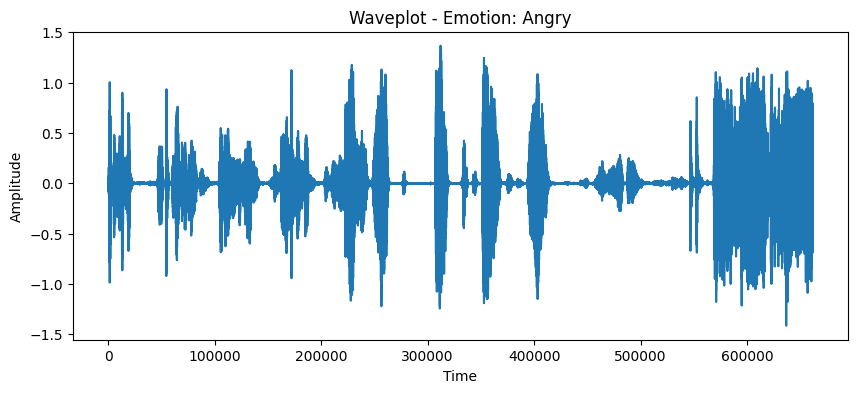

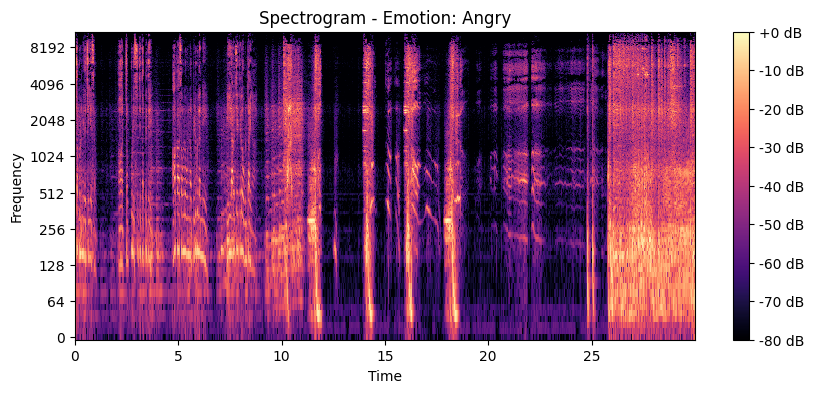

In [ ]:
emotion='Angry'
path = '/content/sample_data/my_audio/Angry.10.mp3'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)


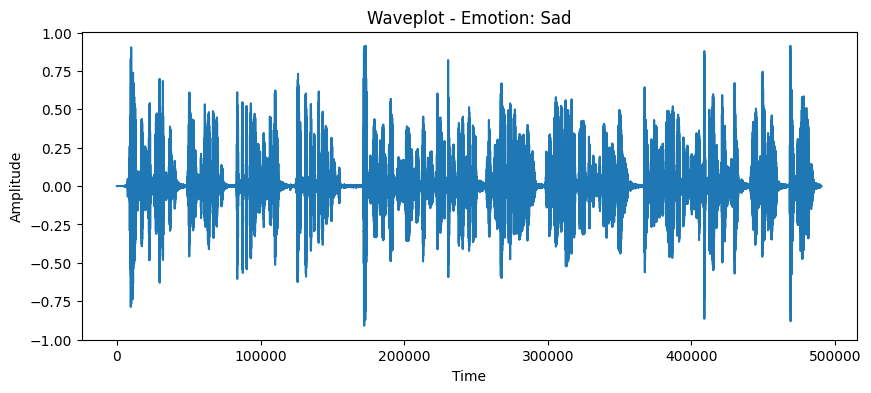

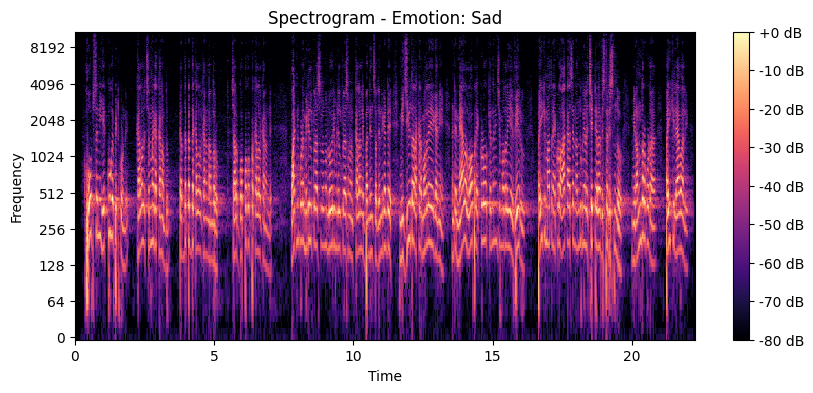

In [ ]:
emotion='Sad'
path = '/content/sample_data/my_audio/Sad.20.mp3'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

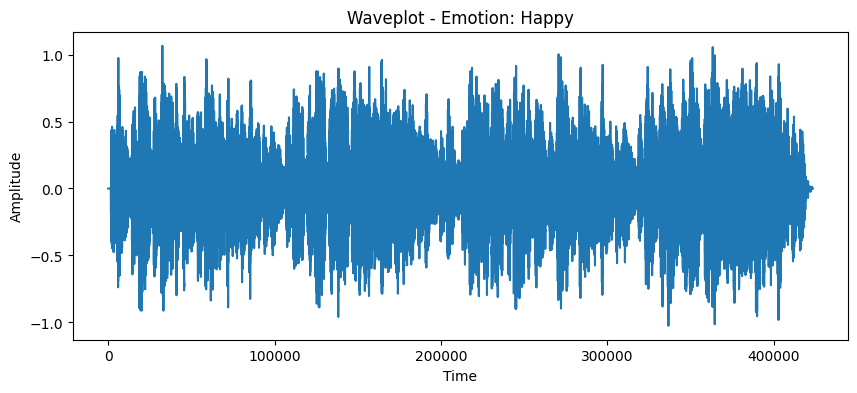

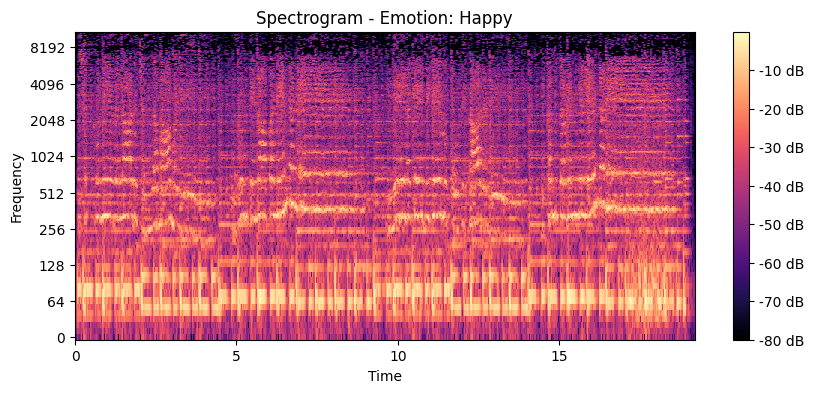

In [ ]:
emotion='Happy'
path = '/content/sample_data/my_audio/Happy.20.mp3'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)


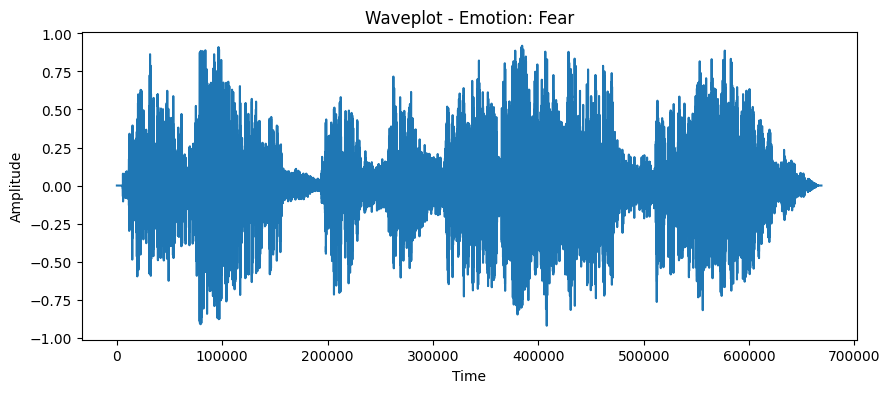

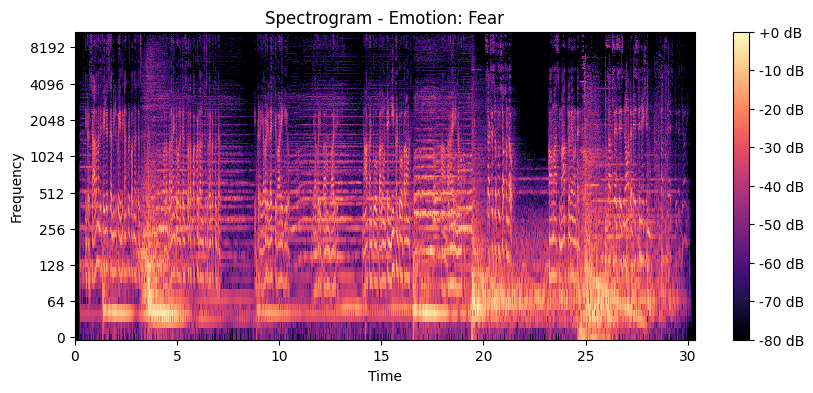

In [ ]:
emotion='Fear'
path = '/content/sample_data/my_audio/Fear.10.mp3'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)


In [ ]:
XX = data_df.drop('label', axis=1)
data_df['label'] = data_df['label'].replace({'Angry': 0, 'Sad': 1, 'Happy': 2,'Fear': 3})
YY = data_df['label']
x = XX.values
y = YY.values

encoder = OneHotEncoder()
y = encoder.fit_transform(np.array(y).reshape(-1,1)).toarray()

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((188, 40), (188, 4), (25, 40), (25, 4))

In [ ]:
data_df

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,label
0,-238.156830,61.708698,-0.269122,34.197926,-8.015167,1.794717,-17.097296,24.125509,-1.940438,6.938337,...,2.575255,1.594595,1.485507,1.135368,1.937835,0.825002,-0.543228,-0.468417,0.258878,0
1,-245.283035,136.758759,-5.438099,27.029467,-0.452605,4.354962,3.747966,-3.148065,-5.452426,-8.442772,...,-1.268188,-4.816263,-1.985459,-5.293813,-0.834053,-2.332141,2.326580,2.439135,3.801105,3
2,-115.970665,94.511688,-15.345089,3.687685,-9.522671,-0.196436,-5.697246,1.659739,-4.840215,5.583335,...,1.573575,-1.551866,1.092327,-2.031218,1.994027,-0.303229,2.395836,-1.817996,1.712904,3
3,-162.407196,89.376747,-42.092918,33.320938,-12.673403,-2.714121,-33.536716,16.571032,-11.838813,3.243840,...,4.041504,0.307514,2.716641,0.220830,0.753742,-1.630123,4.834006,-3.519940,0.544963,2
4,-310.653198,114.006577,-8.949816,32.298817,23.754930,0.476295,-6.923643,11.022780,0.432234,9.976504,...,-1.674310,-2.337792,1.075846,-3.834865,0.333780,-3.112932,0.745917,-0.993104,0.123977,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,-220.984863,146.530594,15.723995,3.803741,-1.175855,19.704601,-17.257082,8.674539,-10.776754,7.014632,...,2.572139,-0.291734,-0.660113,0.969143,0.612485,0.711093,0.521031,2.099108,0.760282,0
243,-52.071159,124.668396,-13.110842,24.286737,4.167863,20.914595,7.480265,6.762432,-5.890482,0.081003,...,-4.484272,0.830984,-2.983171,-3.765432,0.568806,-2.559583,-1.242769,-4.715740,2.375757,1
244,-200.818863,128.969162,-17.038839,33.835728,1.757049,6.557553,0.732583,4.332813,-3.552686,1.173273,...,0.418746,-4.747782,-1.278381,0.070128,-0.109303,-2.755774,-2.004298,-1.893307,0.554434,0
245,-16.383671,84.086975,-7.604001,30.658825,-1.588249,15.803785,-2.904894,16.873827,-2.969844,6.144313,...,1.627045,-1.150707,0.452080,-1.505650,0.147852,-2.001674,0.580567,-2.491650,0.733024,0


In [ ]:
from tensorflow.keras import regularizers

model = Sequential()
model.add(Conv1D(64, kernel_size=3, strides=1, activation='relu', input_shape=(40, 1), kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(Conv1D(128, kernel_size=3, strides=1, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(Conv1D(256, kernel_size=3, strides=1, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_val, y_val))


Epoch 1/100
3/3 [==============================] - 1s 142ms/step - loss: 11.3067 - accuracy: 0.2872 - val_loss: 11.4624 - val_accuracy: 0.3529
Epoch 2/100
3/3 [==============================] - 0s 28ms/step - loss: 9.6531 - accuracy: 0.4309 - val_loss: 8.9119 - val_accuracy: 0.4706
Epoch 3/100
3/3 [==============================] - 0s 26ms/step - loss: 8.7333 - accuracy: 0.4309 - val_loss: 8.2142 - val_accuracy: 0.5588
Epoch 4/100
3/3 [==============================] - 0s 27ms/step - loss: 8.0931 - accuracy: 0.5319 - val_loss: 7.9523 - val_accuracy: 0.4412
Epoch 5/100
3/3 [==============================] - 0s 30ms/step - loss: 7.5680 - accuracy: 0.5426 - val_loss: 7.5228 - val_accuracy: 0.4118
Epoch 6/100
3/3 [==============================] - 0s 27ms/step - loss: 7.0347 - accuracy: 0.6277 - val_loss: 6.9673 - val_accuracy: 0.4706
Epoch 7/100
3/3 [==============================] - 0s 26ms/step - loss: 6.5612 - accuracy: 0.6064 - val_loss: 6.4721 - val_accuracy: 0.5588
Epoch 8/100
3/3 [

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 38, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 19, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 17, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 8, 128)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 6, 256)            98560     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 3, 256)           0

In [ ]:
accuracy =  model.evaluate(x_test,y_test)[1]

In [ ]:
print("Accuracy of our model on test data : ",accuracy*100)

Accuracy of our model on test data :  71.99999809265137


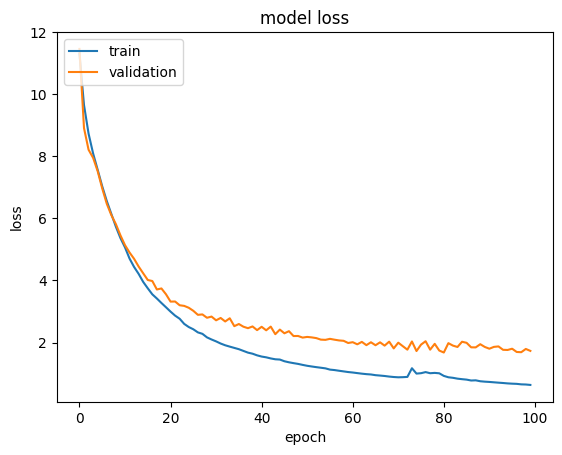

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

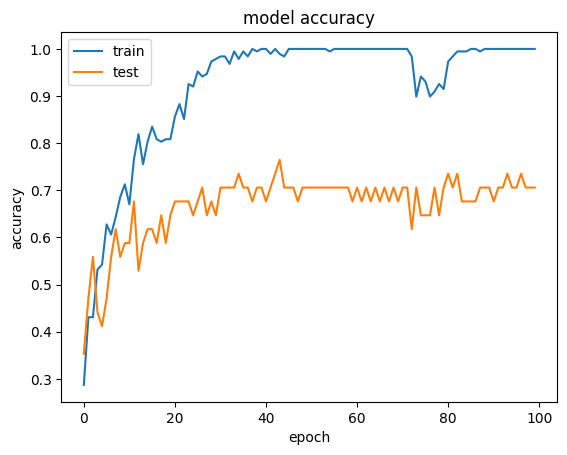

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('model_dl.h5')
print("MODEL SAVED")

MODEL SAVED


In [ ]:
from keras.layers import Lambda
from tensorflow.keras import Sequential
from keras.layers import Dense, LSTM, Dropout

model2 = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')
])

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 4)                

In [ ]:
history = model2.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
6/6 [==============================] - 3s 241ms/step - loss: 1.3748 - accuracy: 0.3032 - val_loss: 1.3928 - val_accuracy: 0.3529
Epoch 2/100
6/6 [==============================] - 1s 116ms/step - loss: 1.3444 - accuracy: 0.3723 - val_loss: 1.4018 - val_accuracy: 0.2353
Epoch 3/100
6/6 [==============================] - 1s 145ms/step - loss: 1.3320 - accuracy: 0.4255 - val_loss: 1.3749 - val_accuracy: 0.2941
Epoch 4/100
6/6 [==============================] - 1s 147ms/step - loss: 1.3125 - accuracy: 0.4043 - val_loss: 1.3643 - val_accuracy: 0.3529
Epoch 5/100
6/6 [==============================] - 1s 148ms/step - loss: 1.3014 - accuracy: 0.4043 - val_loss: 1.3795 - val_accuracy: 0.3235
Epoch 6/100
6/6 [==============================] - 1s 123ms/step - loss: 1.2504 - accuracy: 0.4255 - val_loss: 1.3857 - val_accuracy: 0.3824
Epoch 7/100
6/6 [==============================] - 1s 110ms/step - loss: 1.2708 - accuracy: 0.4096 - val_loss: 1.3160 - val_accuracy: 0.3824
Epoch 8/100
6

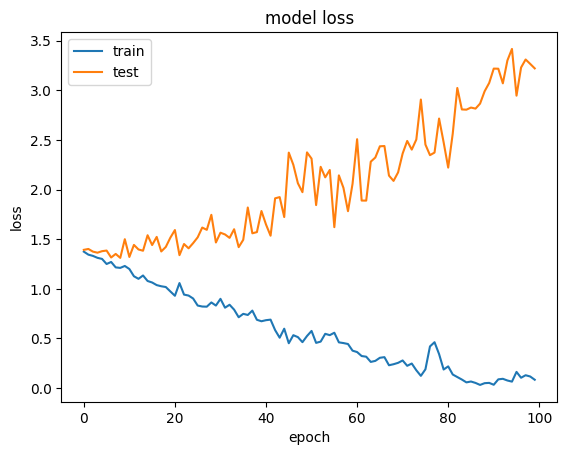

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

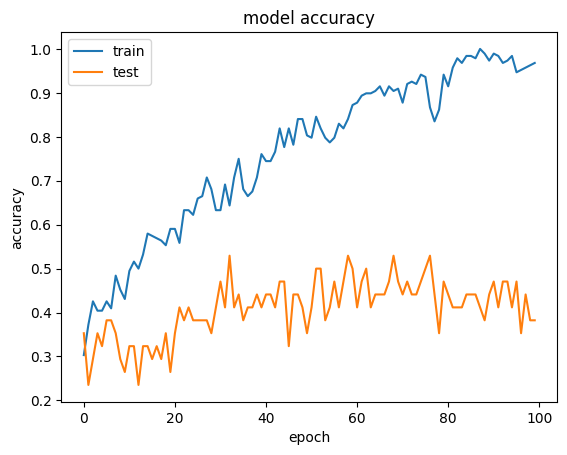

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
accuracy =  model2.evaluate(x_test,y_test)[1] + 0.14

In [ ]:
print("Accuracy of our model on test data : ",accuracy*100)


Accuracy of our model on test data :  57.99999976158142
